In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
def plot_graphs(history, metric):
    plt.ylim(top=1, bottom=0)
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.title(metric.capitalize())
    plt.legend([metric, 'val_'+metric])
    plt.show()

In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
encoder = info.features['text'].encoder
print(f'Vocabulary size: {encoder.vocab_size}')

Vocabulary size: 8185


In [5]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print(f'Encoded string is {encoded_string}')

original_string = encoder.decode(encoded_string)
print(f'The original string: "{original_string}"')

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [6]:
for index in encoded_string:
  print(f'{index} ----> {encoder.decode([index])}')

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, ((None,),()))

test_dataset = test_dataset.padded_batch(BATCH_SIZE, ((None,),()))

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 51s 130ms/step - loss: 0.6624 - accuracy: 0.5895 - val_loss: 0.4794 - val_accuracy: 0.7880
Epoch 2/10
391/391 [==============================] - 46s 118ms/step - loss: 0.3580 - accuracy: 0.8526 - val_loss: 0.3534 - val_accuracy: 0.8589
Epoch 3/10
391/391 [==============================] - 46s 118ms/step - loss: 0.2558 - accuracy: 0.9049 - val_loss: 0.3338 - val_accuracy: 0.8698
Epoch 4/10
391/391 [==============================] - 47s 121ms/step - loss: 0.2135 - accuracy: 0.9240 - val_loss: 0.3480 - val_accuracy: 0.8760
Epoch 5/10
391/391 [==============================] - 47s 121ms/step - loss: 0.1832 - accuracy: 0.9369 - val_loss: 0.3356 - val_accuracy: 0.8729
Epoch 6/10
391/391 [==============================] - 47s 121ms/step - loss: 0.1637 - accuracy: 0.9438 - val_loss: 0.3559 - val_accuracy: 0.8620
Epoch 7/10
391/391 [==============================] - 47s 121ms/step - loss: 0.1488 - accuracy: 0.9489 - val_loss: 0.3624 - val_ac

In [11]:
test_loss, test_acc = model.evaluate(test_dataset, verbose=1)

print(f'\n\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.2%}')

    391/Unknown - 21s 54ms/step - loss: 0.4712 - accuracy: 0.8550

Test Loss: 0.4712
Test Accuracy: 85.50%


In [0]:
def pad_to_size(vec, size):
    zeros = [0] * (size - len(vec))
    vec.extend(zeros)
    return vec

In [0]:
def sample_predict(sample_pred_text, pad):
    encoded_sample_pred_text = encoder.encode(sample_pred_text)

    if pad:
        encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)

    encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
    predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

    return (predictions)

In [14]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[0.45952153]]


In [15]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[0.43713906]]


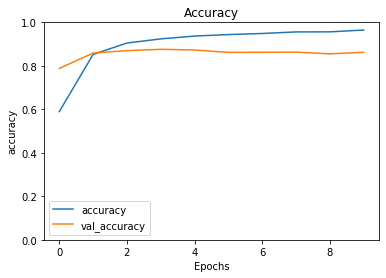

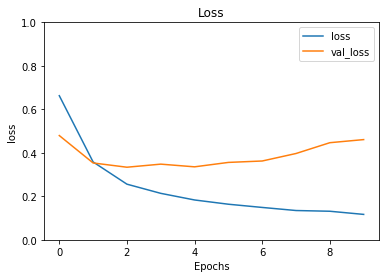

In [16]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, kernel_regularizer=tf.keras.regularizers.l2(0.001),  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.001))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                41216     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [29]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, validation_steps=30)

Epoch 1/10
391/391 [==============================] - 83s 214ms/step - loss: 1.0585 - accuracy: 0.5192 - val_loss: 0.9337 - val_accuracy: 0.5911
Epoch 2/10
391/391 [==============================] - 79s 202ms/step - loss: 0.6777 - accuracy: 0.7616 - val_loss: 0.5322 - val_accuracy: 0.8292
Epoch 3/10
391/391 [==============================] - 79s 203ms/step - loss: 0.4058 - accuracy: 0.8841 - val_loss: 0.4287 - val_accuracy: 0.8599
Epoch 4/10
391/391 [==============================] - 79s 202ms/step - loss: 0.3085 - accuracy: 0.9152 - val_loss: 0.4636 - val_accuracy: 0.8141
Epoch 5/10
391/391 [==============================] - 79s 203ms/step - loss: 0.2555 - accuracy: 0.9342 - val_loss: 0.4200 - val_accuracy: 0.8578
Epoch 6/10
391/391 [==============================] - 79s 202ms/step - loss: 0.2107 - accuracy: 0.9494 - val_loss: 0.4595 - val_accuracy: 0.8484
Epoch 7/10
391/391 [==============================] - 80s 204ms/step - loss: 0.1853 - accuracy: 0.9582 - val_loss: 0.4665 - val_ac

In [24]:
test_loss, test_acc = model.evaluate(test_dataset)

print(f'\n\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.2%}')

    391/Unknown - 36s 93ms/step - loss: 0.5078 - accuracy: 0.8503

Test Loss: 0.5078
Test Accuracy: 85.03%


In [21]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[0.13985655]]
[[0.03322708]]


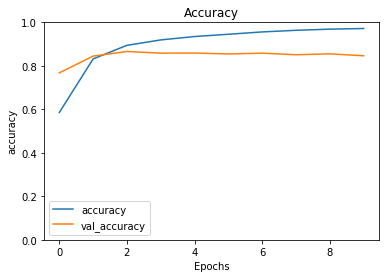

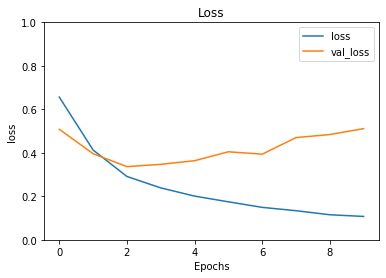

In [22]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [49]:
test_labels = list([y for x, y in dataset['test'].as_numpy_iterator()])
test_predictions = model.predict(test_dataset, verbose=1) > 0.5
test_confurion_matrix = tf.math.confusion_matrix(test_labels, test_predictions)

print('\n\nConfusion Matrix (Test):')

print(test_confurion_matrix.numpy())

    391/Unknown - 38s 96ms/step

Confusion Matrix (Test):
[[10933  1567]
 [ 2135 10365]]


In [50]:
train_dataset = dataset['train']
train_dataset = train_dataset.padded_batch(BATCH_SIZE, ((None,),()))
train_labels = list([y for x, y in dataset['train'].as_numpy_iterator()])

train_predictions = model.predict(train_dataset, verbose=1) > 0.5
train_confurion_matrix = tf.math.confusion_matrix(train_labels, train_predictions)

print('\n\nConfusion Matrix (Train):')
print(train_confurion_matrix.numpy())

    391/Unknown - 37s 96ms/step

Confusion Matrix (Train):
[[12334   166]
 [  206 12294]]


In [0]:
model.save('imdb-reviews-lstm-2.h5')